Welcome to  your first Classification Tasks
Get Ready to Dig in Classification World

# **Classifiers**


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata')  # Fix This if your file is in a Certain Directory in Your Drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn import tree

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


Do you remember Label Encoding ?
Look at this

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25 ,random_state= 0)
X_train

array([[15810075, 'Female', 44, 39000],
       [15583681, 'Male', 32, 120000],
       [15733964, 'Female', 38, 50000],
       ...,
       [15591433, 'Male', 36, 52000],
       [15776348, 'Female', 27, 54000],
       [15794661, 'Female', 26, 118000]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15810075, 0, 44, 39000],
       [15583681, 1, 32, 120000],
       [15733964, 0, 38, 50000],
       ...,
       [15591433, 1, 36, 52000],
       [15776348, 0, 27, 54000],
       [15794661, 0, 26, 118000]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# **Decisison Tree**

In [ ]:
# function to perform training with entropy
clf = DecisionTreeClassifier(random_state= 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_en = clf.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred_en)*100)

Accuracy score :  91.0


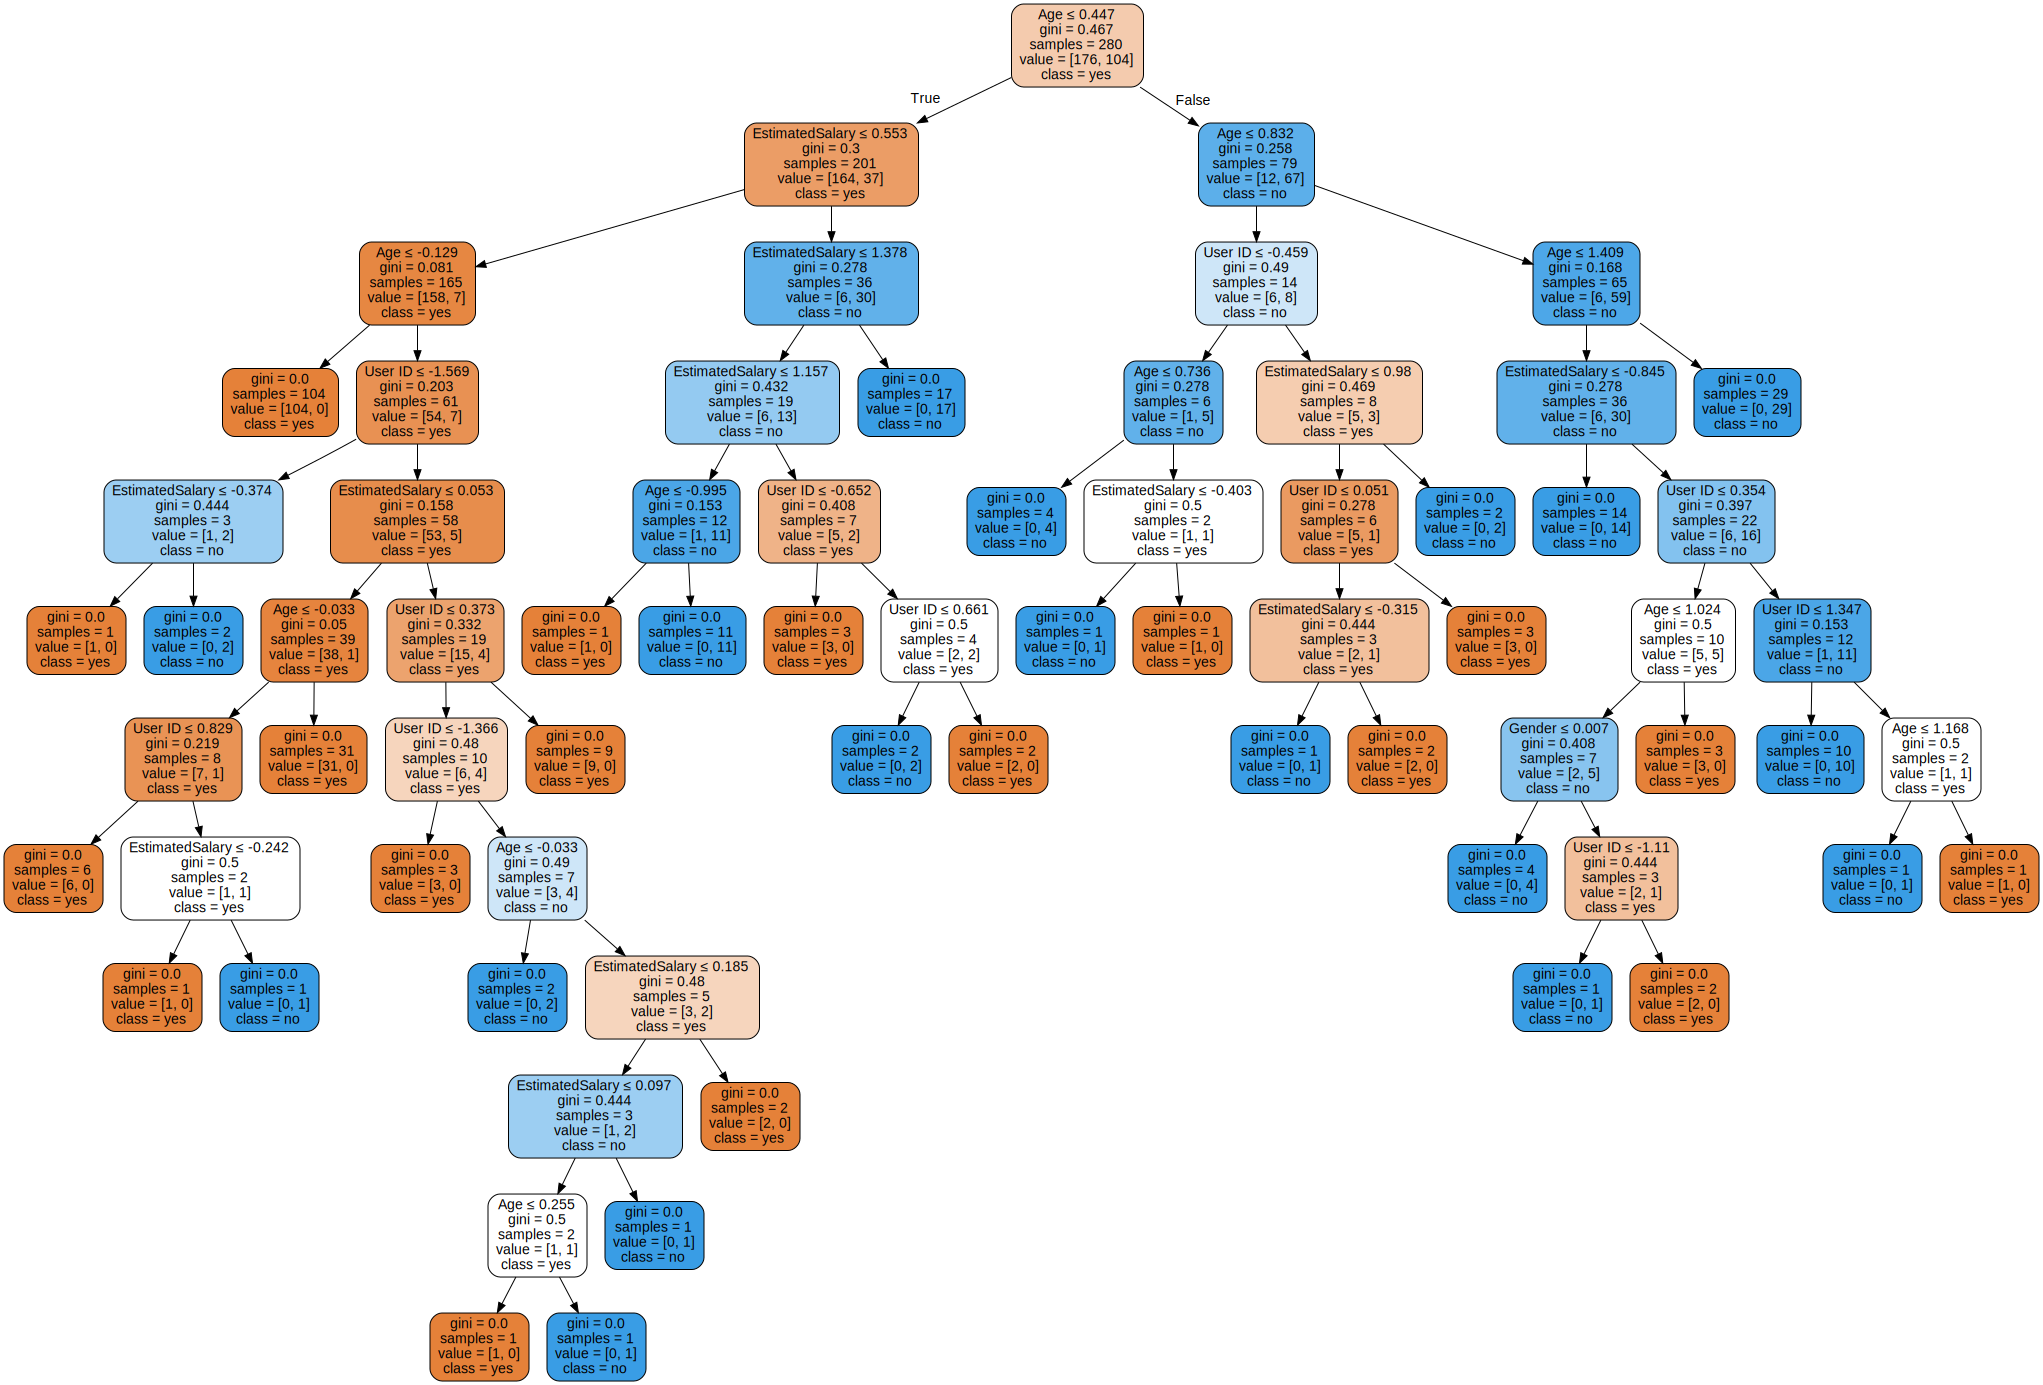

In [ ]:
# For Visualization  of the Tree
import graphviz
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names = X.columns,
                         class_names = ["yes","no"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Try to increase the Accuracy of the Previous Decision Tree

1. Play with Test Size.
2. Try Scaling Techniques.
3. Modify Tree Parameters.
4. Try To Understand Any Parameter You change.

In [ ]:
# function to perform training with entropy

clfv = DecisionTreeClassifier(random_state= 0,min_samples_split=2, splitter= 'random' , min_samples_leaf= 5  )
clfv.fit(X_train, y_train)
y_pred_en = clfv.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred_en)*100)

Accuracy score :  88.0


In [ ]:
classifier = DecisionTreeClassifier ( random_state = 0)
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'min_samples_split': [2, 4 , 6], "criterion" :["gini", "entropy", "log_loss"]},
              {'min_samples_split': [2, 4,6], "criterion" :["gini", "entropy", "log_loss"], "splitter":["best", "random"] , "min_samples_leaf": [0.1,2, 5,10, 20,50]}]


grid_search = GridSearchCV(estimator = classifier,        # The Classifer That we need its best Parameters
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries
                           scoring = 'accuracy',          # The type of Evaluation Metric
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = 3)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS!

grid_search = grid_search.fit(X_train, y_train)

print("best accuracy is :" , grid_search.best_score_)

grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

best accuracy is : 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
390 fits failed out of a total of 1170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFa

{'criterion': 'gini',
 'min_samples_leaf': 0.1,
 'min_samples_split': 2,
 'splitter': 'best'}

# Build a Logistic Regression

1. From Sk Learn Try to build a Logistic Regression
2. Check the Accuracy  of it and compare with DT
3. What do you think Logistic Regression has limit with ?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Your Code Here

lg =  LogisticRegression(random_state= 4 , solver = "liblinear" , penalty = "l1" )
lg.fit(X_train, y_train)
y_pred_en = lg.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred_en)*100)

Accuracy score :  87.0


In [ ]:
classifier = LogisticRegression(random_state= 4 )
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"], "penalty":["l1", 'l2', 'elasticnet'] }]


grid_search = GridSearchCV(estimator = classifier,        # The Classifer That we need its best Parameters
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries
                           scoring = 'accuracy',          # The type of Evaluation Metric
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = 3)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS!

grid_search = grid_search.fit(X_train, y_train)

print("best accuracy is :" , grid_search.best_score_)

grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

best accuracy is : 0.8333333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver

{'penalty': 'l1', 'solver': 'liblinear'}

# **Confusion Matrix**  



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


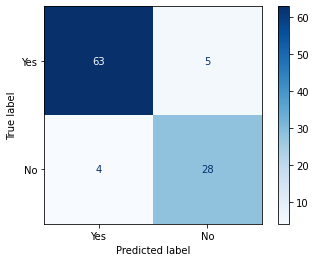

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
# !conda install scikit-learn=0.22

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_en)
cm

array([[63,  5],
       [ 4, 28]])

# **Cross Validation**
Let's Use Cross Validation Techniques
1.   For Validating the Model
2.   To Get the Best Hyper Parameters


**Validation Techniques**
- Validation Set Approach.
- Leave One Out Cross Validation.
- K-Fold Cross Validation

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: %.5f%% " % (results.mean()*100.0))

Accuracy: 84.33333% 


In [ ]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
results = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = loocv)
print("Accuracy: %.3f%% " % (results.mean()*100.0))

Accuracy: 83.333% 


In [ ]:
results

# **Grid Search CV** :Getting Best Hyper Parameters


In [ ]:
# Pick a Classifier you are searching for its best Paramters
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10 , 100], 'kernel': ['linear']},
              {'C': [1, 10,100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2 , 0.3]}]


grid_search = GridSearchCV(estimator = classifier,        # The Classifer That we need its best Parameters
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries
                           scoring = 'accuracy',          # The type of Evaluation Metric
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = 3)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS!

grid_search = grid_search.fit(X_train, y_train)

print("best accuracy is :" , grid_search.best_score_)

grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric

best accuracy is : 0.8966666666666667


{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}

In [ ]:
classifier = SVC(kernel = 'rbf',C=1, tol=1e-1,  gamma= 0.3 )
classifier.fit(X_train,y_train)
y_pr=classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pr)*100

92.0

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
parameters= {'n_estimators':[100,200,500,600],
             'max_depth':[3,5,7]}


grid_search = GridSearchCV(estimator = rf,        # The Classifer That we need its best Parameters
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries
                           scoring = 'accuracy',          # The type of Evaluation Metric
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs = -1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS!



grid_search = grid_search.fit(X_train, y_train)

print("best accuracy is :" , grid_search.best_score_)

grid_search.best_params_


In [ ]:
preds=rf.predict(X_test)
accuracy_score(y_test,preds)

# **Saving And Loading Models**

In [ ]:
import pickle
# save the model to disk
filename = '3atrees.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.91


In [ ]:
# inference
import pickle

loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_test)

# Things Now Get More Tense
Build the Following Codes
* K - Nearest Neighbours
* SVM [ Linear ]
* Random Forest
With Confusion Matrix for each and [Cross Validate](https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/) them
